# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">함수</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 데이터 준비와 확인</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 불러오기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터로더 구성</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 모델 구성을 위한 데이터 분석 및 가공</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터셋 내 문장 길이 분포</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 적절한 최대 문장 길이 지정</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span>keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 모델 구성 및 validation set 구성하기</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : RNN 모델 사용해보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 모델 빌드 및 훈련</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 결과</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span>Loss, Accuracy 그래프 시각화</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span>학습된 Embedding 레이어 분석</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : CNN 모델 사용해보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 모델 빌드 및 훈련</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 결과</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span>Loss, Accuracy 그래프 시각화</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span>학습된 Embedding 레이어 분석</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 6</span> : GlobalMaxPooling1D() 레이어 하나만 사용해보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 모델 빌드 및 훈련</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 결과</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span>Loss, Accuracy 그래프 시각화</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span>학습된 Embedding 레이어 분석</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 한국어 Word2Vec 임베딩 활용하여 성능 개선</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">회고</i>
</ol>

<div style = "height: 50px;"></div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
txt_file_path = "/content/drive/MyDrive/data/*"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 필요한 모듈 불러오기

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 2s (130 kB/s)
Reading package li

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141807 sha256=159d035064d3e4039d87464198979c93bd29def136ed681335ca4e8be6f03239
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [5]:
import konlpy
import os
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import tensorflow        as tf

from collections                   import Counter
from gensim.models                 import KeyedVectors
from gensim.models.keyedvectors    import Word2VecKeyedVectors
from konlpy.tag                    import Mecab
from tensorflow.keras.initializers import Constant

In [73]:
import gensim
print(gensim.__version__)

3.6.0


<div style = "height: 50px;"><div/>

# 함수

In [12]:
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 데이터 준비와 확인

## 1. 데이터 불러오기
<hr/>

In [6]:
train_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/ratings_test.txt')

In [7]:
train_data.shape

(150000, 3)

In [8]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


<div style = "height: 50px;"></div>

## 2. 데이터로더 구성
<hr/>

In [10]:
mecab = Mecab()
sentence = "안녕하세요 저는 천재입니다."
temp_X = mecab.morphs(sentence)
temp_X

['안녕', '하', '세요', '저', '는', '천재', '입니다', '.']

In [11]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

146182
146182
49157
49157


In [15]:
index_to_word = {index:word for word, index in word_to_index.items()}

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 모델 구성을 위한 데이터 분석 및 가공

## 1. 데이터셋 내 문장 길이 분포
<hr/>

In [17]:
def x_len(x):
    len_list = []
    for i in x[:]:
        len_list.append(len(i))
    return len_list

In [18]:
X_train_len = x_len(X_train)
X_test_len = x_len(X_test)

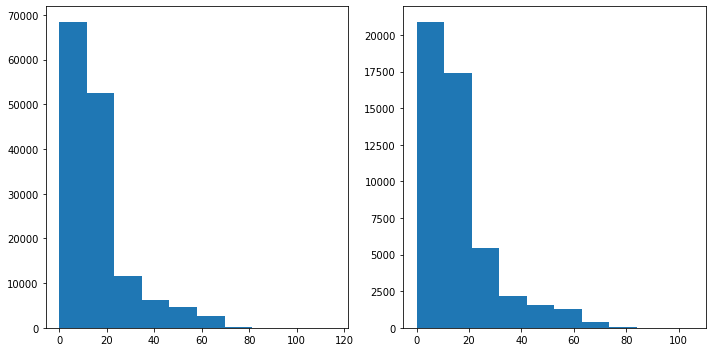

In [19]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(X_train_len)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.hist(X_test_len)
plt.tight_layout()
plt.show()

<div style = "height: 50px;"></div>

## 2. 적절한 최대 문장 길이 지정
<hr/>

In [20]:
def x_y_set(x, y, max_len):
    x_list = []
    y_list = []

    for i in range(len(x)):
        if len(x[i]) <= max_len:
            x_list.append(x[i])
            y_list.append(y[i])
            
    return x_list, y_list

In [21]:
max_len =60
X_train_max_len, y_train_max_len = x_y_set(X_train, y_train, 60)
X_test_max_len, y_test_max_len = x_y_set(X_test, y_test, 60)

In [22]:
print(len(X_train_max_len))
print(len(y_train_max_len))
print(len(X_test_max_len))
print(len(y_test_max_len))

144478
144478
48561
48561


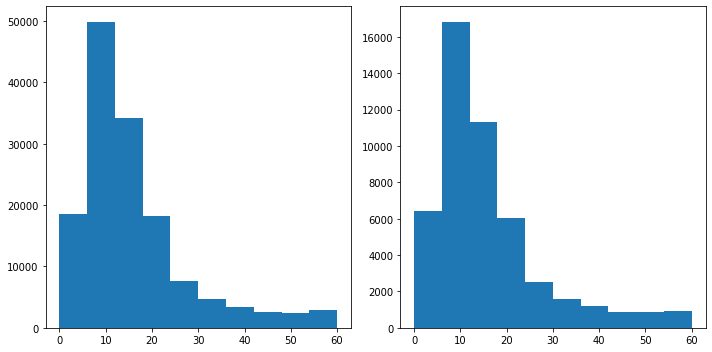

In [23]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(x_len(X_train_max_len))
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.hist(x_len(X_test_max_len))
plt.tight_layout()
plt.show()

<div style = "height: 50px;"></div>

## 3. keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가
<hr/>

In [24]:
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_max_len, padding = 'post', maxlen = 60)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_max_len, padding = 'post', maxlen = 60, )

In [25]:
X_train_max_len[0]

[32, 74, 919, 4, 4, 39, 228, 20, 33, 748]

In [26]:
X_train_pad[0]

array([ 32,  74, 919,   4,   4,  39, 228,  20,  33, 748,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [27]:
vocab_size = len(word_to_index)
word_vector_dim = 18
embedding = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = word_vector_dim, mask_zero = True)
X_train_output = embedding(X_test_pad)
print(X_train_output)

tf.Tensor(
[[[ 0.01739215  0.0141306  -0.03558817 ... -0.03880792 -0.01055026
    0.0476997 ]
  [ 0.00111719 -0.02787294  0.01826494 ...  0.0174114   0.03934306
    0.00463039]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  ...
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]]

 [[ 0.02204298 -0.00083508  0.04987867 ...  0.00040017 -0.04575721
    0.0058374 ]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  ...
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.00748948
   -0.03931192]
  [-0.03989946  0.011544   -0.04102788 ... -0.00730138 -0.0074

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : validation set 구성하기
<hr/>

In [28]:
len(X_train_max_len) * 0.2

28895.600000000002

In [29]:
print(len(X_train_max_len))
print(len(y_train_max_len))
print(len(X_test_max_len))
print(len(y_test_max_len))

144478
144478
48561
48561


In [30]:
x_validation = X_train_pad[: 28896]
y_validation = np.array(y_train_max_len[: 28896])

partial_x_train = X_train_pad[28896 : ]
partial_y_train = np.array(y_train_max_len[28896 : ])

print(len(x_validation))
print(len(y_validation))
print(len(partial_x_train))
print(len(partial_y_train))

28896
28896
115582
115582


In [31]:
print(type(x_validation))
print(type(y_validation))
print(type(partial_x_train))
print(type(partial_y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : RNN 모델 사용해보기

## 1. 모델 빌드 및 훈련
<hr/>

In [32]:
vocab_size = len(word_to_index)
word_vector_dim = 44

RNN_model = tf.keras.Sequential()
RNN_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
RNN_model.add(tf.keras.layers.LSTM(8)) # LSTM state 벡터의 차원수 8로 지정
RNN_model.add(tf.keras.layers.Dense(1, activation = 'relu'))
RNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력 = 긍정/부정을 나타내는 1dim 
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 44)          439868    
                                                                 
 lstm (LSTM)                 (None, 8)                 1696      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 441,575
Trainable params: 441,575
Non-trainable params: 0
_________________________________________________________________


In [33]:
RNN_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
epochs = 15

RNN_history = RNN_model.fit(partial_x_train, partial_y_train,
                    epochs = epochs,
                    batch_size = 1300,
                    validation_data = (x_validation, y_validation),
                    verbose = 1)

Epoch 1/15
89/89 [==============================] - 4s 15ms/step - loss: 0.6931 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 2/15
89/89 [==============================] - 1s 10ms/step - loss: 0.6746 - accuracy: 0.5733 - val_loss: 0.5879 - val_accuracy: 0.8098
Epoch 3/15
89/89 [==============================] - 1s 10ms/step - loss: 0.5365 - accuracy: 0.8235 - val_loss: 0.5037 - val_accuracy: 0.8321
Epoch 4/15
89/89 [==============================] - 1s 10ms/step - loss: 0.4805 - accuracy: 0.8476 - val_loss: 0.4834 - val_accuracy: 0.8393
Epoch 5/15
89/89 [==============================] - 1s 10ms/step - loss: 0.4496 - accuracy: 0.8569 - val_loss: 0.4678 - val_accuracy: 0.8312
Epoch 6/15
89/89 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8642 - val_loss: 0.4573 - val_accuracy: 0.8393
Epoch 7/15
89/89 [==============================] - 1s 10ms/step - loss: 0.4073 - accuracy: 0.8702 - val_loss: 0.4474 - val_accuracy: 0.8397
Epoch 8/15
89

<div style = "height: 50px;"></div>

## 2. 결과
<hr/>

In [34]:
RNN_results = RNN_model.evaluate(X_test_pad,  np.array(y_test_max_len), verbose=2)

print(RNN_results)

1518/1518 - 4s - loss: 0.4364 - accuracy: 0.8330 - 4s/epoch - 2ms/step
[0.4364004135131836, 0.8330347537994385]


<div style = "height: 50px;"></div>

## 3. Loss, Accuracy 그래프 시각화
<hr/>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


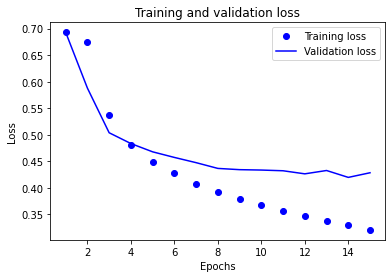

In [35]:
history_dict = RNN_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')


# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

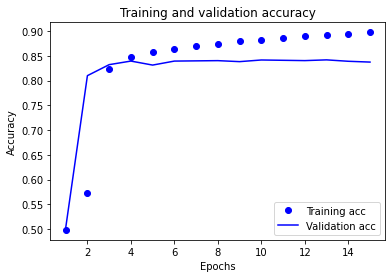

In [36]:
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<div style = "height: 50px;"></div>

## 4. 학습된 Embedding 레이어 분석
<hr/>

In [37]:
RNN_embedding_layer = RNN_model.layers[0]
RNN_weights = RNN_embedding_layer.get_weights()[0]
print(RNN_weights.shape)

(9997, 44)


In [39]:
# 학습한 Embedding 파라미터를 파일로 저장
RNN_word2vec_file_path = '/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/RNN_word2vec.txt'
f = open(RNN_word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
RNN_vectors = RNN_model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(RNN_vectors[i, :])))))
f.close()

In [40]:
RNN_word_vectors = Word2VecKeyedVectors.load_word2vec_format(RNN_word2vec_file_path, binary = False)
RNN_vector = RNN_word_vectors['영화']
RNN_vector

array([-0.05906652, -0.0444975 ,  0.04105128,  0.02147722, -0.00501111,
       -0.00467284, -0.00015361,  0.02981164, -0.01712641,  0.04850099,
       -0.07382317, -0.02702132, -0.04680471, -0.03726866,  0.02895099,
        0.03142045,  0.01059424,  0.06977507, -0.02078792, -0.08828101,
        0.01205345,  0.0147964 , -0.00896131,  0.00985705,  0.01965772,
        0.02529895, -0.01801086, -0.06412504, -0.04409361,  0.06147726,
       -0.05104702, -0.08815452, -0.04852761, -0.04220143, -0.04017475,
       -0.00557928,  0.02728544, -0.01996727, -0.07257251, -0.03391552,
        0.08525986,  0.05771123,  0.0466009 ,  0.03980947], dtype=float32)

In [41]:
RNN_word_vectors.similar_by_word('진짜')

[('건데', 0.7085562348365784),
 ('창조', 0.6958976984024048),
 ('논하', 0.667813241481781),
 ('넘겼', 0.6626989245414734),
 ('심플', 0.6555767059326172),
 ('나온다', 0.654461145401001),
 ('보다', 0.654447078704834),
 ('몰라도', 0.654334306716919),
 ('상', 0.6523994207382202),
 ('!!!!!!!!!!!!!', 0.6493546366691589)]

In [42]:
RNN_word_vectors.similar_by_word('정말')

[('완전', 0.7917925119400024),
 ('제일', 0.7721673250198364),
 ('긴장감', 0.7307114005088806),
 ('재미', 0.7280653715133667),
 ('관람', 0.7161640524864197),
 ('그대로', 0.7126644253730774),
 ('보호', 0.7111402750015259),
 ('자세히', 0.7044540643692017),
 ('변화', 0.6976720094680786),
 ('자리', 0.689934253692627)]

In [43]:
RNN_word_vectors.similar_by_word('최고')

[('명품', 0.9559497833251953),
 ('에게서', 0.9401549100875854),
 ('브금', 0.9399318099021912),
 ('굿', 0.9370490908622742),
 ('디테일', 0.9358862638473511),
 ('푸하하', 0.9356364011764526),
 ('쓸쓸', 0.9348366260528564),
 ('강추', 0.9346030950546265),
 ('살아가', 0.9336600303649902),
 ('울음', 0.9330934286117554)]

In [44]:
RNN_word_vectors.similar_by_word('별로')

[('실망', 0.9632649421691895),
 ('억지', 0.9557440280914307),
 ('기대치', 0.9500850439071655),
 ('졸작', 0.9486311078071594),
 ('소품', 0.9462482333183289),
 ('웩', 0.9444524049758911),
 ('홍보', 0.9443424344062805),
 ('식상', 0.9441393613815308),
 ('바꿔서', 0.9422009587287903),
 ('지겹', 0.9415041208267212)]

In [45]:
RNN_word_vectors.similar_by_word('치킨')

[('넓', 0.619469404220581),
 ('뮤직', 0.6094489097595215),
 ('F', 0.5942366123199463),
 ('모자', 0.5872000455856323),
 ('탄식', 0.5605895519256592),
 ('참으로', 0.5509776473045349),
 ('판사', 0.5507638454437256),
 ('섹스', 0.5480803847312927),
 ('박한별', 0.542304515838623),
 ('클', 0.5298713445663452)]

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : CNN 모델 사용해보기

## 1. 모델 빌드 및 훈련
<hr/>

In [46]:
vocab_size = len(word_to_index)
word_vector_dim = 44

CNN_model = tf.keras.Sequential()
CNN_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
CNN_model.add(tf.keras.layers.Conv1D(16, 7, activation = 'relu'))
CNN_model.add(tf.keras.layers.MaxPooling1D(5))
CNN_model.add(tf.keras.layers.Conv1D(16, 7, activation = 'relu'))
CNN_model.add(tf.keras.layers.GlobalMaxPooling1D())
CNN_model.add(tf.keras.layers.Dense(12, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 44)          439868    
                                                                 
 conv1d (Conv1D)             (None, None, 16)          4944      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 16)          1808      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 12)               

In [47]:
CNN_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
epochs = 5

CNN_history = CNN_model.fit(partial_x_train, partial_y_train,
                    epochs = epochs,
                    batch_size = 1300,
                    validation_data = (x_validation, y_validation),
                    verbose = 1)

Epoch 1/5
89/89 [==============================] - 2s 10ms/step - loss: 0.5855 - accuracy: 0.7106 - val_loss: 0.3916 - val_accuracy: 0.8308
Epoch 2/5
89/89 [==============================] - 1s 8ms/step - loss: 0.3511 - accuracy: 0.8494 - val_loss: 0.3413 - val_accuracy: 0.8525
Epoch 3/5
89/89 [==============================] - 1s 8ms/step - loss: 0.3040 - accuracy: 0.8723 - val_loss: 0.3355 - val_accuracy: 0.8557
Epoch 4/5
89/89 [==============================] - 1s 8ms/step - loss: 0.2777 - accuracy: 0.8860 - val_loss: 0.3372 - val_accuracy: 0.8561
Epoch 5/5
89/89 [==============================] - 1s 8ms/step - loss: 0.2527 - accuracy: 0.8989 - val_loss: 0.3444 - val_accuracy: 0.8534


<div style = "height: 50px;"></div>

## 2. 결과
<hr/>

In [48]:
CNN_results = CNN_model.evaluate(X_test_pad,  np.array(y_test_max_len), verbose=2)

print(CNN_results)

1518/1518 - 3s - loss: 0.3529 - accuracy: 0.8514 - 3s/epoch - 2ms/step
[0.3529163599014282, 0.8514446020126343]


<div style = "height: 50px;"></div>

## 3. Loss, Accuracy 그래프 시각화
<hr/>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


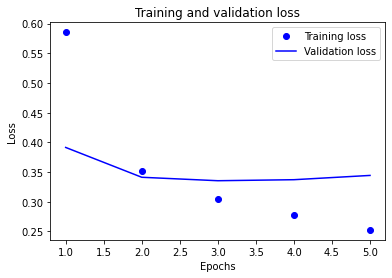

In [49]:
history_dict = CNN_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')


# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

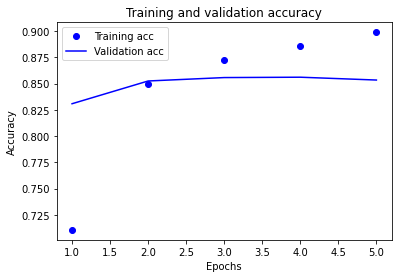

In [50]:
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<div style = "height: 50px;"></div>

## 4. 학습된 Embedding 레이어 분석
<hr/>

In [51]:
CNN_embedding_layer = CNN_model.layers[0]
CNN_weights = CNN_embedding_layer.get_weights()[0]
print(CNN_weights.shape)

(9997, 44)


In [52]:
# 학습한 Embedding 파라미터를 파일로 저장
CNN_word2vec_file_path = '/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/CNN_word2vec.txt'
f = open(CNN_word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
CNN_vectors = CNN_model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(CNN_vectors[i, :])))))
f.close()

In [53]:
CNN_word_vectors = Word2VecKeyedVectors.load_word2vec_format(CNN_word2vec_file_path, binary = False)
CNN_vector = CNN_word_vectors['영화']
CNN_vector


array([-0.02859354, -0.01128813, -0.12534681, -0.10457932, -0.01935094,
        0.01064936,  0.02528037,  0.05568872, -0.03552131,  0.07194804,
       -0.07544861, -0.05451072, -0.03179049,  0.01779179, -0.06928601,
       -0.04315341, -0.03826336, -0.11868771,  0.00632917,  0.00875774,
        0.06960207, -0.01341743,  0.03173927, -0.0348291 ,  0.03383405,
       -0.05621026, -0.0158373 , -0.04142895,  0.02051182,  0.01188162,
        0.00191757,  0.08305448,  0.01392497, -0.01094551,  0.02729407,
       -0.01140898, -0.02736622,  0.04524361,  0.00390541,  0.03124704,
        0.05075379,  0.0614788 ,  0.00519728, -0.02332128], dtype=float32)

In [54]:
CNN_word_vectors.similar_by_word('진짜')

[('완전', 0.7046858072280884),
 ('잼', 0.6596934795379639),
 ('몰입', 0.6518080830574036),
 ('내세운', 0.6493896245956421),
 ('이렇게', 0.6481965780258179),
 ('당할', 0.6474054455757141),
 ('진짜로', 0.6349284648895264),
 ('너무', 0.6344619989395142),
 ('기자', 0.630359947681427),
 ('재미', 0.6259148120880127)]

In [55]:
CNN_word_vectors.similar_by_word('정말')

[('매우', 0.6577383279800415),
 ('긴장감', 0.652165412902832),
 ('완전', 0.6513265371322632),
 ('너무', 0.6465782523155212),
 ('맥주', 0.6337964534759521),
 ('이어서', 0.6057108640670776),
 ('너무나', 0.6044490337371826),
 ('몰입', 0.5900447368621826),
 ('퍼', 0.5880023837089539),
 ('손예진', 0.581063985824585)]

In [56]:
CNN_word_vectors.similar_by_word('최고')

[('이제서야', 0.8416839838027954),
 ('크리스', 0.8095072507858276),
 ('슬프', 0.8075834512710571),
 ('눈물', 0.8061972856521606),
 ('봣', 0.804397702217102),
 ('광해', 0.8002585768699646),
 ('발달', 0.8000196814537048),
 ('나무랄', 0.7961642742156982),
 ('great', 0.7934116125106812),
 ('탁월', 0.7896368503570557)]

In [57]:
CNN_word_vectors.similar_by_word('별로')

[('단조', 0.9051671028137207),
 ('상품', 0.8766458630561829),
 ('인내심', 0.8763510584831238),
 ('실패작', 0.8756976127624512),
 ('결과물', 0.8718061447143555),
 ('어설프', 0.8698682188987732),
 ('졸작', 0.8681517839431763),
 ('피눈물', 0.8611901998519897),
 ('더군', 0.8608614206314087),
 ('잤', 0.8600863814353943)]

In [58]:
CNN_word_vectors.similar_by_word('치킨')

[('그치만', 0.6673532724380493),
 ('아나운서', 0.58408522605896),
 ('다녀왔', 0.5822352766990662),
 ('개독', 0.5718849897384644),
 ('흐른다', 0.5692781209945679),
 ('달라진', 0.5589168071746826),
 ('묘미', 0.5543772578239441),
 ('한들', 0.5525764226913452),
 ('신세계', 0.5461791753768921),
 ('대작', 0.5455015301704407)]

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 6</span> : GlobalMaxPooling1D() 레이어 하나만 사용해보기

## 1. 모델 빌드 및 훈련
<hr/>

In [59]:
vocab_size = len(word_to_index)
word_vector_dim = 44

GMP_model = tf.keras.Sequential()
GMP_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
GMP_model.add(tf.keras.layers.GlobalMaxPooling1D())
GMP_model.add(tf.keras.layers.Dense(8, activation = 'relu'))
GMP_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
GMP_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 44)          439868    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 44)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 8)                 360       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 440,237
Trainable params: 440,237
Non-trainable params: 0
_________________________________________________________________


In [60]:
GMP_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
epochs = 10

GMP_history = GMP_model.fit(partial_x_train, partial_y_train, 
                            epochs = epochs,
                            batch_size = 1300,
                            validation_data = (x_validation, y_validation),
                            verbose = 1)

Epoch 1/10
89/89 [==============================] - 1s 8ms/step - loss: 0.6659 - accuracy: 0.6689 - val_loss: 0.6139 - val_accuracy: 0.7740
Epoch 2/10
89/89 [==============================] - 1s 6ms/step - loss: 0.5241 - accuracy: 0.8147 - val_loss: 0.4376 - val_accuracy: 0.8337
Epoch 3/10
89/89 [==============================] - 1s 6ms/step - loss: 0.3826 - accuracy: 0.8491 - val_loss: 0.3628 - val_accuracy: 0.8439
Epoch 4/10
89/89 [==============================] - 1s 6ms/step - loss: 0.3271 - accuracy: 0.8656 - val_loss: 0.3454 - val_accuracy: 0.8497
Epoch 5/10
89/89 [==============================] - 1s 6ms/step - loss: 0.2995 - accuracy: 0.8774 - val_loss: 0.3410 - val_accuracy: 0.8514
Epoch 6/10
89/89 [==============================] - 1s 6ms/step - loss: 0.2791 - accuracy: 0.8873 - val_loss: 0.3417 - val_accuracy: 0.8522
Epoch 7/10
89/89 [==============================] - 1s 7ms/step - loss: 0.2617 - accuracy: 0.8955 - val_loss: 0.3446 - val_accuracy: 0.8526
Epoch 8/10
89/89 [==

<div style = "height: 50px;"></div>

## 2. 결과
<hr/>

In [61]:
GMP_results = GMP_model.evaluate(X_test_pad,  np.array(y_test_max_len), verbose=2)

print(GMP_results)

1518/1518 - 2s - loss: 0.3778 - accuracy: 0.8456 - 2s/epoch - 2ms/step
[0.37784433364868164, 0.8455756902694702]


<div style = "height: 50px;"></div>

## 3. Loss, Accuracy 그래프 시각화
<hr/>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


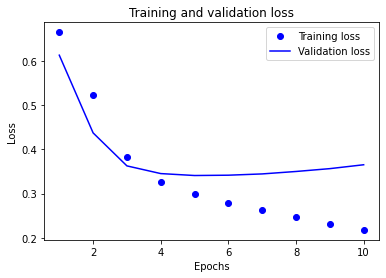

In [62]:
history_dict = GMP_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')


# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

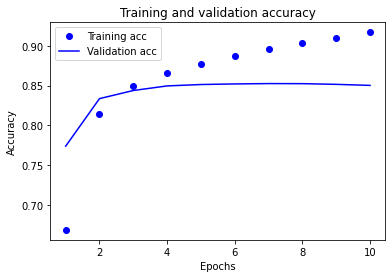

In [63]:
plt.clf()   # 그림을 초기화

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<div style = "height: 50px;"></div>

## 4. 학습된 Embedding 레이어 분석
<hr/>

In [64]:
GMP_embedding_layer = GMP_model.layers[0]
GMP_weights = GMP_embedding_layer.get_weights()[0]
print(GMP_weights.shape)

(9997, 44)


In [66]:
# 학습한 Embedding 파라미터를 파일로 저장
GMP_word2vec_file_path = '/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/GMP_word2vec.txt'
f = open(GMP_word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
GMP_vectors = GMP_model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(GMP_vectors[i, :])))))
f.close()

In [67]:
GMP_word_vectors = Word2VecKeyedVectors.load_word2vec_format(GMP_word2vec_file_path, binary = False)
GMP_vector = GMP_word_vectors['영화']
GMP_vector

array([-0.13105142, -0.12449968,  0.00274017, -0.16059189, -0.10957483,
       -0.14372927, -0.15310399, -0.0997595 , -0.13330916, -0.11769242,
       -0.03911424, -0.11130154, -0.13325413, -0.15157749, -0.12930477,
       -0.03048346, -0.06865128, -0.14970277, -0.13272296, -0.14931361,
       -0.13123418, -0.11308586, -0.07533618, -0.13696718, -0.08906175,
       -0.11374767, -0.11134628, -0.10712086, -0.11560119, -0.13971624,
       -0.09995597, -0.1122441 , -0.13395114, -0.13680667, -0.12727809,
       -0.12775306, -0.02563593, -0.11172091, -0.13952897, -0.0759284 ,
       -0.13830455, -0.10516822, -0.11533499, -0.03156059], dtype=float32)

In [68]:
GMP_word_vectors.similar_by_word('진짜')

[('고', 0.9784148931503296),
 ('아', 0.9732162356376648),
 ('음', 0.9707576632499695),
 ('영화', 0.9685788154602051),
 ('해', 0.9683749675750732),
 ('다', 0.9672117829322815),
 ('을', 0.965150773525238),
 ('나', 0.9645290970802307),
 ('까지', 0.9630981683731079),
 (',', 0.9630743861198425)]

In [69]:
GMP_word_vectors.similar_by_word('정말')

[('드라마', 0.8566045761108398),
 ('네요', 0.840599536895752),
 ('크루즈', 0.8147498369216919),
 ('인듯', 0.8012757301330566),
 ('냉소', 0.7996145486831665),
 ('면서', 0.7991406917572021),
 ('스타뎀', 0.789128303527832),
 ('두', 0.7710831761360168),
 ('고생', 0.7654062509536743),
 ('아기', 0.7639186382293701)]

In [70]:
GMP_word_vectors.similar_by_word('최고')

[('스칼렛', 0.6727931499481201),
 ('글로리아', 0.6587813496589661),
 ('다가온', 0.6516712307929993),
 ('펑펑', 0.6305366158485413),
 ('일어날', 0.6253266334533691),
 ('최강희', 0.6229966878890991),
 ('유전', 0.6200709342956543),
 ('1990', 0.6189375519752502),
 ('멋지', 0.6102612018585205),
 ('눈물', 0.610137403011322)]

In [71]:
GMP_word_vectors.similar_by_word('별로')

[('꼴', 0.8116064667701721),
 ('약해', 0.7382359504699707),
 ('-_', 0.734628438949585),
 ('관우', 0.7246147394180298),
 ('못해', 0.7221726179122925),
 ('엄태웅', 0.718218207359314),
 ('우기', 0.7164523005485535),
 ('--;', 0.7148311138153076),
 ('한심', 0.7131366729736328),
 ('박철수', 0.7112268805503845)]

In [72]:
GMP_word_vectors.similar_by_word('치킨')

[('히치콕', 0.5752558708190918),
 ('열혈', 0.5736199617385864),
 ('사진', 0.5732329487800598),
 ('..!', 0.5622642040252686),
 ('예언', 0.5566619038581848),
 ('불안', 0.5549644231796265),
 ('느낄', 0.553730845451355),
 ('취급', 0.5508794784545898),
 ('스페이스', 0.550162672996521),
 ('적절히', 0.5429126024246216)]

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 7</span> : 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [74]:
word2vec_path ='/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/ko.bin'
temp_model = gensim.models.Word2Vec.load(word2vec_path)

In [75]:
temp_model.similar_by_word("치킨")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('아이스크림', 0.7841869592666626),
 ('머핀', 0.7798093557357788),
 ('햄버거', 0.7517204284667969),
 ('푸딩', 0.7428526878356934),
 ('튀김', 0.7406421303749084),
 ('초콜릿', 0.7316878437995911),
 ('소시지', 0.707494854927063),
 ('샌드위치', 0.7064745426177979),
 ('요구르트', 0.7048976421356201),
 ('와플', 0.7046411037445068)]

In [76]:
temp_model.similar_by_word("영화")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('다큐멘터리', 0.7265259027481079),
 ('영화사', 0.715214192867279),
 ('드라마', 0.705294132232666),
 ('뮤지컬', 0.6947016716003418),
 ('코미디', 0.69093257188797),
 ('영화인', 0.6702202558517456),
 ('서부극', 0.6571458578109741),
 ('스릴러', 0.6533164978027344),
 ('로맨스', 0.6428799629211426),
 ('애니메이션', 0.6425570249557495)]

In [77]:
temp_model.similar_by_word("진짜")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('가짜', 0.5982679128646851),
 ('정말로', 0.5857688188552856),
 ('바보', 0.5664166212081909),
 ('그저', 0.5368781089782715),
 ('엄마', 0.5301429033279419),
 ('당신', 0.5208492875099182),
 ('강아지', 0.5187654495239258),
 ('프라이빗', 0.5174241065979004),
 ('수수께끼', 0.5051365494728088),
 ('약혼자', 0.504402756690979)]

In [78]:
temp_model.similar_by_word("정말")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('정말로', 0.6876157522201538),
 ('솔직히', 0.6717334389686584),
 ('...', 0.6635288000106812),
 ('..', 0.661450982093811),
 ('뭐', 0.6610672473907471),
 ('과연', 0.6546894311904907),
 ('아무래도', 0.6335057020187378),
 ('아무리', 0.6218235492706299),
 ('참으로', 0.6067756414413452),
 ('굉장히', 0.6040467023849487)]

In [79]:
temp_model.similar_by_word("노래")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('가사', 0.7066930532455444),
 ('곡조', 0.6870777010917664),
 ('곡', 0.6749094724655151),
 ('발라드', 0.6573207378387451),
 ('멜로디', 0.6572505235671997),
 ('주제가', 0.6365448832511902),
 ('애국가', 0.6258596181869507),
 ('곡인', 0.6254721879959106),
 ('히트곡', 0.6253563165664673),
 ('원곡', 0.6200122833251953)]

In [80]:
temp_model.similar_by_word("재미")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('취미', 0.5857348442077637),
 ('유머', 0.5140613913536072),
 ('매력', 0.5105490684509277),
 ('흥미', 0.4988338351249695),
 ('공짜', 0.4960595667362213),
 ('일자리', 0.49294644594192505),
 ('즐거움', 0.48700767755508423),
 ('비애', 0.4836210310459137),
 ('관객', 0.48286449909210205),
 ('향수', 0.4823310971260071)]

In [81]:
temp_model.similar_by_word("슬픔")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('기쁨', 0.7767106294631958),
 ('절망', 0.7710496783256531),
 ('아픔', 0.7430999279022217),
 ('비탄', 0.7297681570053101),
 ('고독', 0.7251476049423218),
 ('사랑', 0.7216662168502808),
 ('외로움', 0.7195188999176025),
 ('추억', 0.6951203346252441),
 ('이별', 0.6873862147331238),
 ('괴로움', 0.6854110956192017)]

In [82]:
temp_model.similar_by_word("명작")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('걸작', 0.7933748364448547),
 ('작품', 0.7375749945640564),
 ('대작', 0.686141848564148),
 ('희극', 0.6746902465820312),
 ('희곡', 0.674653947353363),
 ('거장', 0.6636549234390259),
 ('대표작', 0.6602857112884521),
 ('단편집', 0.6207208633422852),
 ('히트곡', 0.6082459688186646),
 ('가곡', 0.6028263568878174)]

In [83]:
temp_model.similar_by_word("별로")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('그다지', 0.516608476638794),
 ('지역별', 0.49092748761177063),
 ('전혀', 0.48824024200439453),
 ('각기', 0.4875951111316681),
 ('개별', 0.47797343134880066),
 ('따로', 0.4700734317302704),
 ('마다', 0.46785035729408264),
 ('별', 0.45661038160324097),
 ('딱히', 0.4535921812057495),
 ('다소', 0.43761277198791504)]

In [84]:
temp_model.similar_by_word("최고")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('최대', 0.5721614360809326),
 ('최강', 0.5064552426338196),
 ('유일한', 0.46688494086265564),
 ('일류', 0.46184951066970825),
 ('최악', 0.4529539942741394),
 ('최연소', 0.45037323236465454),
 ('랭킹', 0.4485436677932739),
 ('제일의', 0.44647401571273804),
 ('최초', 0.44505739212036133),
 ('최상', 0.4345606565475464)]

자체학습한 임베딩과 사전학습 임베딩에 대해 gensim의 유사단어 찾기를 실행시킨 결과, 직접 모델을 빌드하여 사전학습시킨 임베딩보다는 Word2Vec가 훨씬 좋은 성능을 내는 것을 확인할 수 있었다. <br/>
사전 학습을 진행한 3개의 모델에서는 LSTM이 가장 좋은 성능을 보였으며, RNN과 GlobalMaxPooling1D() 레이어 하나만 사용한 모델은 성능이 좋지 않은 것을 확인하였다.

<div style = "height: 50px;"></div>

In [85]:
word_vector_dim = 200

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)
embedding_matrix[5]

array([0.68588699, 0.09331727, 0.21794494, 0.56966807, 0.81487768,
       0.2962148 , 0.58478031, 0.99220869, 0.09811547, 0.75512786,
       0.50625416, 0.05763827, 0.13410673, 0.16642366, 0.55333444,
       0.60047343, 0.08561777, 0.31772257, 0.89304459, 0.61247502,
       0.55384937, 0.71473184, 0.78233177, 0.51190861, 0.26118826,
       0.20080462, 0.47625955, 0.43920573, 0.18279327, 0.69140103,
       0.11382464, 0.70344011, 0.14287793, 0.93782769, 0.2742982 ,
       0.69314121, 0.14902858, 0.99776671, 0.37213298, 0.51705063,
       0.55366677, 0.72732243, 0.34115286, 0.20571257, 0.29750049,
       0.79441121, 0.37765531, 0.49097294, 0.22091294, 0.41079522,
       0.64373811, 0.19579707, 0.74639419, 0.92920132, 0.55582613,
       0.50268808, 0.41619586, 0.65041187, 0.49593047, 0.28158577,
       0.90661281, 0.57195667, 0.34068407, 0.8310956 , 0.03391548,
       0.73381053, 0.64030516, 0.04408758, 0.09356224, 0.13107621,
       0.77081954, 0.60241947, 0.96307051, 0.57299479, 0.44012

In [86]:
# embedding_matrix에 temp_model 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4, vocab_size):
    if index_to_word[i] in temp_model:
        embedding_matrix[i] = temp_model[index_to_word[i]]

embedding_matrix[5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


array([-1.75778365, -1.08742785,  1.53008664, -0.1115231 , -0.37980682,
        1.48285174,  1.31804192,  0.11094163,  0.7430535 , -0.45461136,
        0.58841336,  0.57639128,  1.21070695,  1.31327951, -0.86962503,
       -0.18507595, -0.47440064,  1.51007247,  1.09657943,  1.06008232,
       -0.27457932, -0.70003706,  2.31175113,  1.49448836,  0.25560892,
       -2.86665893, -0.28312334,  0.34263936, -0.67723423,  0.71714777,
        0.25549442,  0.71732044, -0.13262457,  0.01792452, -0.31847739,
        0.5271619 ,  0.7561084 , -2.12470651,  1.06142902, -0.21065854,
        0.68773431, -1.49563825,  0.60346967, -2.6955893 ,  0.37694618,
       -1.01641846,  0.54306632,  0.1200121 , -2.63157177,  0.62167418,
        1.15839756, -2.53859615,  1.32631195, -0.10284371, -0.0286147 ,
       -0.91329467,  0.76475638,  0.79202783, -1.86259568, -0.74183953,
        0.58842772, -0.99179918, -0.62114453,  1.53678155, -0.66289389,
        0.67121029,  0.12914915,  0.21228492,  0.90176553, -0.25

<div style = "height: 50px;"></div>

## 1. VGG16 모방하여 감정 분석 진행해보기
<hr/>

In [136]:
vocab_size = len(word_to_index)
word_vector_dim = 200

temp_model = tf.keras.Sequential()
temp_model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer = Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length = 60, 
                                 trainable = True))   # trainable을 True로 주면 Fine-tuning

temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.MaxPooling1D())

temp_model.add(tf.keras.layers.Conv1D(8, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(8, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(8, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.MaxPooling1D())

temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.Conv1D(16, 3, activation = 'relu'))
temp_model.add(tf.keras.layers.MaxPooling1D())

temp_model.add(tf.keras.layers.Flatten())

temp_model.add(tf.keras.layers.Dense(16, activation = 'relu'))
temp_model.add(tf.keras.layers.Dropout(0.3))

temp_model.add(tf.keras.layers.Dense(8, activation = 'relu'))
temp_model.add(tf.keras.layers.Dropout(0.3))

temp_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력 = 긍정/부정을 나타내는 1dim 
temp_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 60, 200)           1999400   
                                                                 
 conv1d_40 (Conv1D)          (None, 58, 16)            9616      
                                                                 
 conv1d_41 (Conv1D)          (None, 56, 16)            784       
                                                                 
 conv1d_42 (Conv1D)          (None, 54, 16)            784       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 27, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_43 (Conv1D)          (None, 25, 8)             392       
                                                     

In [137]:
temp_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
epochs = 10

temp_history = temp_model.fit(partial_x_train, partial_y_train,
                    epochs = epochs,
                    batch_size = 120,
                    validation_data = (x_validation, y_validation),
                    verbose = 1)

Epoch 1/10
964/964 [==============================] - 9s 8ms/step - loss: 0.5450 - accuracy: 0.7239 - val_loss: 0.4269 - val_accuracy: 0.8136
Epoch 2/10
964/964 [==============================] - 7s 8ms/step - loss: 0.4103 - accuracy: 0.8300 - val_loss: 0.3592 - val_accuracy: 0.8451
Epoch 3/10
964/964 [==============================] - 7s 7ms/step - loss: 0.3594 - accuracy: 0.8556 - val_loss: 0.3449 - val_accuracy: 0.8508
Epoch 4/10
964/964 [==============================] - 7s 7ms/step - loss: 0.3339 - accuracy: 0.8695 - val_loss: 0.3411 - val_accuracy: 0.8541
Epoch 5/10
964/964 [==============================] - 7s 7ms/step - loss: 0.3124 - accuracy: 0.8785 - val_loss: 0.3319 - val_accuracy: 0.8590
Epoch 6/10
964/964 [==============================] - 7s 7ms/step - loss: 0.2970 - accuracy: 0.8846 - val_loss: 0.3489 - val_accuracy: 0.8574
Epoch 7/10
964/964 [==============================] - 8s 8ms/step - loss: 0.2806 - accuracy: 0.8937 - val_loss: 0.3453 - val_accuracy: 0.8559
Epoch 

<div style = "height: 50px;"></div>

### 결과

In [135]:
temp_results = temp_model.evaluate(X_test_pad,  np.array(y_test_max_len), verbose=2)

print(temp_results)

1518/1518 - 3s - loss: 0.4089 - accuracy: 0.8436 - 3s/epoch - 2ms/step
[0.40885138511657715, 0.8435987830162048]


<div style = "height: 50px;"></div>

## 2. LSTM 여러층 쌓아 감정분석 진행해보기
<hr/>

In [149]:
vocab_size = len(word_to_index)
word_vector_dim = 200

temp_model = tf.keras.Sequential()
temp_model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer = Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length = 60, 
                                 trainable = True))   # trainable을 True로 주면 Fine-tuning

temp_model.add(tf.keras.layers.LSTM(16, return_sequences = True))
temp_model.add(tf.keras.layers.LSTM(16, return_sequences = True))
temp_model.add(tf.keras.layers.LSTM(16))
temp_model.add(tf.keras.layers.Dense(16, activation = 'relu'))
temp_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력 = 긍정/부정을 나타내는 1dim 
temp_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 60, 200)           1999400   
                                                                 
 lstm_26 (LSTM)              (None, 60, 16)            13888     
                                                                 
 lstm_27 (LSTM)              (None, 60, 16)            2112      
                                                                 
 lstm_28 (LSTM)              (None, 16)                2112      
                                                                 
 dense_53 (Dense)            (None, 16)                272       
                                                                 
 dense_54 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,017,801
Trainable params: 2,017,801
N

In [150]:
temp_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
epochs = 4

temp_history = temp_model.fit(partial_x_train, partial_y_train,
                    epochs = epochs,
                    batch_size = 120,
                    validation_data = (x_validation, y_validation),
                    verbose = 1)

Epoch 1/4
964/964 [==============================] - 18s 14ms/step - loss: 0.5222 - accuracy: 0.7133 - val_loss: 0.3963 - val_accuracy: 0.8309
Epoch 2/4
964/964 [==============================] - 12s 12ms/step - loss: 0.3415 - accuracy: 0.8533 - val_loss: 0.3315 - val_accuracy: 0.8551
Epoch 3/4
964/964 [==============================] - 12s 13ms/step - loss: 0.2972 - accuracy: 0.8753 - val_loss: 0.3294 - val_accuracy: 0.8597
Epoch 4/4
964/964 [==============================] - 12s 13ms/step - loss: 0.2713 - accuracy: 0.8877 - val_loss: 0.3213 - val_accuracy: 0.8606


<div style = "height: 50px;"></div>

### 결과

In [151]:
temp_results = temp_model.evaluate(X_test_pad,  np.array(y_test_max_len), verbose=2)

print(temp_results)

1518/1518 - 6s - loss: 0.3318 - accuracy: 0.8569 - 6s/epoch - 4ms/step
[0.33184346556663513, 0.8568604588508606]


<div style = "height: 50px;"></div>

### 학습된 Embedding 레이어 분석

In [152]:
temp_embedding_layer = temp_model.layers[0]
temp_weights = temp_embedding_layer.get_weights()[0]
print(temp_weights.shape)

(9997, 200)


In [153]:
# 학습한 Embedding 파라미터를 파일로 저장
temp_word2vec_file_path = '/content/drive/MyDrive/Colab Notebooks/ex09/ex_data/temp_word2vec.txt'
f = open(temp_word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
temp_vectors = temp_model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(temp_vectors[i, :])))))
f.close()

In [155]:
temp_word_vectors = Word2VecKeyedVectors.load_word2vec_format(temp_word2vec_file_path, binary = False)

In [156]:
temp_word_vectors.similar_by_word('진짜')

[('정말로', 0.582981288433075),
 ('가짜', 0.5820661783218384),
 ('바보', 0.5626885294914246),
 ('엄마', 0.5129547715187073),
 ('당신', 0.5070330500602722),
 ('아빠', 0.5048729181289673),
 ('그저', 0.5038304328918457),
 ('누군가', 0.4901996850967407),
 ('강아지', 0.48825183510780334),
 ('정말', 0.48797839879989624)]

In [157]:
temp_word_vectors.similar_by_word('정말')

[('정말로', 0.673784077167511),
 ('솔직히', 0.6690795421600342),
 ('...', 0.6489027738571167),
 ('과연', 0.6488072872161865),
 ('..', 0.6378191113471985),
 ('뭐', 0.6265265345573425),
 ('자꾸', 0.6079713106155396),
 ('굉장히', 0.6017631888389587),
 ('아무래도', 0.6010169982910156),
 ('아무리', 0.5911595821380615)]

In [158]:
temp_word_vectors.similar_by_word('최고')

[('최대', 0.5529735088348389),
 ('최강', 0.522979736328125),
 ('최상', 0.4633161127567291),
 ('최초', 0.4546487033367157),
 ('올해', 0.4348379075527191),
 ('손꼽히', 0.4296540319919586),
 ('역대', 0.42244046926498413),
 ('일류', 0.4027862846851349),
 ('최상급', 0.39574480056762695),
 ('총', 0.38743454217910767)]

In [159]:
temp_word_vectors.similar_by_word('별로')

[('그다지', 0.5163819789886475),
 ('딱히', 0.4898771643638611),
 ('전혀', 0.47846031188964844),
 ('따로', 0.47782137989997864),
 ('별', 0.4651632010936737),
 ('마다', 0.4591085910797119),
 ('별반', 0.4519929885864258),
 ('각', 0.432829886674881),
 ('다소', 0.4140284061431885),
 ('아예', 0.3968393802642822)]

In [160]:
temp_word_vectors.similar_by_word('치킨')

[('초콜릿', 0.7135939002037048),
 ('햄버거', 0.7068703770637512),
 ('과자', 0.6726664304733276),
 ('피자', 0.6706809401512146),
 ('브레드', 0.6690836548805237),
 ('커피', 0.6684221029281616),
 ('껌', 0.6581048965454102),
 ('잼', 0.6460750102996826),
 ('당근', 0.6397628784179688),
 ('감자', 0.634341835975647)]

한국어 Word2Vec을 활용하여 LSTM 모델로 감정분석을 진행한 결과, 대체로 유사 단어를 잘 찾아낸 것을 확인하였다.

<div style = "height: 50px;"></div>

## 회고

## 1. 새로 배운점
<hr/>

### LSTM 여러층 쌓는 방법

In [ ]:
# 예시
temp_model.add(tf.keras.layers.LSTM(16, return_sequences = True))
temp_model.add(tf.keras.layers.LSTM(16, return_sequences = True))
temp_model.add(tf.keras.layers.LSTM(16))
temp_model.add(tf.keras.layers.Dense(16, activation = 'relu'))
temp_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
temp_model.summary()

LSTM의 파라미터로 return_sequences = True를 주면, Output Shape가 3차원으로 바뀌게 되며, 다음 층에 LSTM을 더 쌓을 수 있게 된다.

Dense의 인풋 shape는 몇차원이던 상관 없으므로 Dense 전의 LSTM 층에는 return_sequences파라미터를 지정하지 않고 주었다.<br/>
input_shape나 input_dim 등을 사용하여 입력 데이터를 조정할 시에는 차원 과 shape를 고려해야한다.

#### Dense 파라미터
- units = 아웃풋 개수 
- activation = 활성화 함수
- input_shape = 입력 값의 shape 지정
- output_shape = 출력 값의 shape 지정<br/>
...

<div style = "height: 50px;"></div>

## 2. 느낀점
<hr/>

lms에 있는 그대로 모델을 빌드하여 진행 했을 때, Word2Vec임베딩을 활용했음에도 불구하고 성능이 좋지 않았다. 이는 하이퍼파라미터를 조정해도 마찬가지였다.<br/>

때문에 CNN 모델에서는 VGG16을 모방하여 진행하였고, 성능이 조금 좋아진 것을 확인할 수 있었으나, 자연어 처리에는 LSTM이 더 좋은 성능을 내기 때문에, 노드에서 진행한 것보다는 층을 더 쌓아보니 확실히 성능이 좋아진 것을 확인할 수 있었다.

꼭 RNN과 CNN을 지정하여 사용하라는 법은 없지만, 사람들이 자연어 처리에 LSTM을 대체로 사용하는데에는 다 이유가 있는 것 같다.